In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import re
from wordcloud import WordCloud, STOPWORDS

In [2]:
jerky_df = pd.read_csv('https://raw.githubusercontent.com/bendgame/JerkyNotebook/master/jerky.csv')

In [3]:
jerky_df.head(3)

,descriptionID,jerkyID,manufactureDescription,brand,flavor,smoked,protein,calories,gluten free,exotic,sweet,hot,sweetSpicy,teriyaki,original,Peppered,koreanBBQ,honeyGlazed,sodium,chewy,soft,tough,moist,dry,thick,thin,grade,cost,jerkyID.1
0,1,1,Featuring only premium steak with a robust fla...,Cattlemans Cut,Original,0,10,70,0,0,0,0,0,0,1,0,0,0,570,1,0,1,0,1,1,0,NaN,NaN,1
1,2,2,"When you start with slow-cooked premium steak,...",Cattlemans Cut,peppered,0,10,70,0,0,0,1,0,0,0,1,0,0,520,1,0,1,0,1,1,0,NaN,NaN,2
2,3,3,By drenching our premium steak in a mixture of...,Cattlemans Cut,Teriyaki,0,10,70,0,0,0,0,0,1,0,0,0,0,530,1,0,1,0,0,0,0,NaN,NaN,3


In [4]:
jerky_df['norm_desc'] = [manufactureDescription.lower() for manufactureDescription in jerky_df['manufactureDescription']]

In [5]:
clean_desc = []
for w in range(len(jerky_df.norm_desc)):
    
    
    #Remove punctuations
    desc = re.sub('[^a-zA-Z]', ' ', jerky_df['norm_desc'][w])
    
    #remove tags
    desc = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    # remove special characters and digits
    desc = re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc.append(desc)
    
jerky_df['clean_desc'] = clean_desc

In [11]:
word_frequency = pd.Series(' '.join(jerky_df['clean_desc']).split()).value_counts()[:20]
word_frequency.head()

jerky    70
the      67
and      58
beef     55
of       46
dtype: int64

In [7]:
stop_words = set(STOPWORDS) 

add_stopwords = ["beef", "jerky", "flavor"]
stop_words = stop_words.union(add_stopwords)

split = []
for w in range(len(jerky_df['clean_desc'])):

    split_text = jerky_df['clean_desc'][w].split()
    split_text = [word for word in split_text if not word in stop_words] 
    split_text = " ".join(split_text)
    split.append(split_text)

In [10]:
split

['featuring premium steak robust s rooted sweet savory seasoning brown sugar layers hardwood smoke cattleman s cut original slow cooked deliver big bold taste every bite',
 'start slow cooked premium steak brown sugar sweet savory seasoning layers hardwood smoke isn t much improve upon delicious fact thing think adding spicy fresh cracked black pepper',
 'drenching premium steak mixture soy sauce garlic brown sugar savory seasonings slow cooking hours ve created timeless smoky sweet teriyaki will leave craving',
 'flank steak s truly nothing earth thick cuts tender flank steak strips premium meat perfectly marinated garlic pepper brown sugar provide sweet rich start peppery kick make mistake though delicious ll remember',
 'real steak original recipe steaks come plate comes bag premium cuts hand picked marinated chef s soy sauce horseradish worcestershire sauce unique blend combined proprietary smoking process gives original recipe real steak perfect proportion salty spicy sweet',
 're

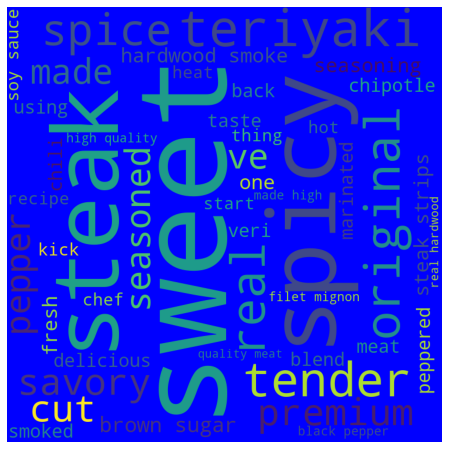

In [9]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'blue',
                          stopwords = stop_words,
                          max_words = 1000,
                          min_font_size = 20 
                          ).generate(str(split))
#print(wordcloud)
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#fig.savefig("wordcloud.png")